## Py2neo

#### Iniciar cliente de neo4j e importar librerías

In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
from py2neo import Graph

graph = Graph(password = 'root')
print(graph.run("MATCH (t:Tweet) RETURN count(t)").evaluate(), 'documents')

966 documents


#### Los 10 tweets más recientes

In [2]:
pd.DataFrame(graph.run("MATCH (u:User)-[r:HAS]->(t:Tweet) RETURN t.id_str, u.username, t.text, t.created_at ORDER BY t.created_at DESC LIMIT 10"))

,0,1,2,3
0,594789566252453889,ameanmbot,RT @rvanhoepen: My @Quora answer to Is Angular...,2015-05-03T09:04:17.000000000+00:00
1,594789484916514816,ameanmbot,RT @kazuyadesse: 2件のコメント http://t.co/w6K1Dw6IJ...,2015-05-03T09:03:58.000000000+00:00
2,594789034016268288,ameanmbot,RT @haduart: Interesting #couchdb weekly http:...,2015-05-03T09:02:11.000000000+00:00
3,594788972854902784,mashable,"An affordable, real gold Apple Watch can be yo...",2015-05-03T09:01:56.000000000+00:00
4,594788791329632256,ameanmbot,RT @findmjob: Backend Devloper http://t.co/7dk...,2015-05-03T09:01:13.000000000+00:00
5,594788703018573824,ameanmbot,RT @webinara: RT: http://t.co/38hiPyvCAL #webi...,2015-05-03T09:00:52.000000000+00:00
6,594788642431852544,javacodegeeks,Testing with #Mockito - Kick-ass #Java Code Ge...,2015-05-03T09:00:37.000000000+00:00
7,594788595652829184,ameanmbot,RT @webcodegeeks: A canonical web test in Node...,2015-05-03T09:00:26.000000000+00:00
8,594788594570686464,Inc,9 Interview Questions Ideo Asks @IlanMochari h...,2015-05-03T09:00:26.000000000+00:00
9,594788522315292673,ChelseaFC,Keep up with the Blues today... http://t.co/Em...,2015-05-03T09:00:09.000000000+00:00


#### Los 10 tweets con más retweets

In [3]:
pd.DataFrame(graph.run("MATCH (u:User)-[r:HAS]->(t:Tweet) RETURN t.id_str, u.username, t.text, t.retweet_count, t.created_at ORDER BY t.retweet_count DESC LIMIT 10"))

,0,1,2,3,4
0,594163852109094912,zeldman,RT @alex_macdonald: I will fight to support th...,9132,2015-05-01T15:37:56.000000000+00:00
1,594153080976998400,zeldman,RT @EliLanger: There are 2 kinds of people in ...,4061,2015-05-01T14:55:07.000000000+00:00
2,592371151445307392,ChelseaFC,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,3804,2015-04-26T16:54:22.000000000+00:00
3,594153610633699329,cnnbrk,"Meet Marilyn Mosby, the state's attorney who c...",3134,2015-05-01T14:57:14.000000000+00:00
4,592383051004542976,ChelseaFC,Mourinho on Arsenal fans' chants: 'Boring is 1...,2610,2015-04-26T17:41:39.000000000+00:00
5,592366832457220096,cnnbrk,The overall death toll in the #NepalQuake has ...,2146,2015-04-26T16:37:13.000000000+00:00
6,592371156625141760,premierleague,FULL-TIME Arsenal 0-0 Chelsea. The Blues need ...,2069,2015-04-26T16:54:24.000000000+00:00
7,591993187629211648,FCBarcelona,FULL TIME: There's the final whistle! #Messi &...,1810,2015-04-25T15:52:29.000000000+00:00
8,592030680009330689,FCBarcelona,"RT @JordiAlba: Hoy día especial,un año que se ...",1793,2015-04-25T18:21:28.000000000+00:00
9,592028831566921729,FCBarcelona,RT @3gerardpique: Gran victoria en Cornellà! S...,1661,2015-04-25T18:14:07.000000000+00:00


#### Los 10 tweets con más favoritos

In [4]:
pd.DataFrame(graph.run("MATCH (u:User)-[r:HAS]->(t:Tweet) RETURN t.id_str, u.username, t.text, t.favorite_count, t.created_at ORDER BY t.favorite_count DESC LIMIT 10"))

,0,1,2,3,4
0,592025821428191232,ultrAslan,SEN ŞAMPİYON OLACAKSINNNNNNNN! \nSENİ SEVMEYEN...,1748,2015-04-25T18:02:09.000000000+00:00
1,594153610633699329,cnnbrk,"Meet Marilyn Mosby, the state's attorney who c...",1721,2015-05-01T14:57:14.000000000+00:00
2,592030833319501824,instagram,Following the journey of two creatives and the...,1494,2015-04-25T18:22:04.000000000+00:00
3,594162319355158528,RT_Erdogan,"Eskiler, önce yoldaş sonra yol derdi. Eğer iyi...",1311,2015-05-01T15:31:50.000000000+00:00
4,592383051004542976,ChelseaFC,Mourinho on Arsenal fans' chants: 'Boring is 1...,1105,2015-04-26T17:41:39.000000000+00:00
5,592371151445307392,ChelseaFC,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,1099,2015-04-26T16:54:22.000000000+00:00
6,592025253620101120,SabriReyiziniz,4ncü hakem uzatmayı gösterdi :( http://t.co/OP...,1092,2015-04-25T17:59:54.000000000+00:00
7,591993187629211648,FCBarcelona,FULL TIME: There's the final whistle! #Messi &...,1011,2015-04-25T15:52:29.000000000+00:00
8,592022338566234112,SabriReyiziniz,Emre Güral Volkan'ı kötürüm bıraktı :(,854,2015-04-25T17:48:19.000000000+00:00
9,592366832457220096,cnnbrk,The overall death toll in the #NepalQuake has ...,840,2015-04-26T16:37:13.000000000+00:00


#### Los tweets del usuario @CsharpCorner

In [5]:
pd.DataFrame(graph.run("MATCH (u:User)-[r:HAS]->(t:Tweet) WHERE u.username = 'CsharpCorner' RETURN t.id_str, t.text, t.retweet_count, t.favorite_count, t.created_at"))

,0,1,2,3,4
0,591995296189534208,ServiceController Class in Windows Service by ...,2,0,2015-04-25T16:00:52.000000000+00:00
1,594762014037180416,Learn Series of How to Crack Coding Interview ...,3,3,2015-05-03T07:14:48.000000000+00:00
2,594165244273922048,#Build2015 Day3: About to start @CsharpCorner ...,18,5,2015-05-01T15:43:27.000000000+00:00
3,592025506049961985,#Xamarin Guide 8: Change the App.cs to App.xam...,0,0,2015-04-25T18:00:54.000000000+00:00
4,594165671182802945,Are you ready &amp; #Excited for #Day3 #Build2...,20,4,2015-05-01T15:45:09.000000000+00:00
5,594754412456775681,RT @dbeniwal21: Free Ebook by @ksr007 Basic SQ...,5,0,2015-05-03T06:44:36.000000000+00:00
6,594165361857069056,#MicrosoftBand SDK Available Now by @mcbeniwal...,19,4,2015-05-01T15:43:55.000000000+00:00
7,594787680254238720,MVC For Beginners: How to Save Record Using MV...,0,1,2015-05-03T08:56:48.000000000+00:00
8,592383013217939457,RT @mcbeniwal: Good #advice by @AnilAwadh on c...,1,0,2015-04-26T17:41:30.000000000+00:00


#### Los tweets con hashtag #Baltimore

In [6]:
pd.DataFrame(graph.run("MATCH (t:Tweet) WHERE t.text CONTAINS '#Baltimore' RETURN t.id_str, t.text, t.retweet_count, t.favorite_count, t.created_at ORDER BY t.created_at DESC"))

,0,1,2,3,4
0,594164218674294784,#Baltimore reacts to charges against six polic...,12,2,2015-05-01T15:39:23.000000000+00:00
1,594160878444015618,"RT @BBCNewsUS: #Baltimore police union says ""n...",76,0,2015-05-01T15:26:07.000000000+00:00
2,594157349679464450,#Baltimore State's attorney says all 6 officer...,45,28,2015-05-01T15:12:05.000000000+00:00
3,594154688720830464,MORE: 6 #Baltimore officers charged in #Freddi...,68,33,2015-05-01T15:01:31.000000000+00:00
4,592373717117890561,RT @BBCNewsUS: ICYMI: Thousands march in #Balt...,93,0,2015-04-26T17:04:34.000000000+00:00


#### Los 10 usuarios con más seguidores

In [7]:
pd.DataFrame(graph.run("MATCH (u:User) RETURN u.id_str, u.username, u.name, u.description, u.statuses_count, u.followers_count ORDER BY u.followers_count DESC LIMIT 10"))

,0,1,2,3,4,5
0,813286,BarackObama,Barack Obama,This account is run by Organizing for Action s...,13440,58672161
1,180505807,instagram,Instagram,Capturing and sharing the world's moments. Nee...,6152,38541311
2,44409004,shakira,Shakira,We invite you to join our #WorldBabyShower for...,3479,30724211
3,428333,cnnbrk,CNN Breaking News,Breaking news from reporters and editors on th...,39782,26405869
4,50393960,BillGates,Bill Gates,Sharing things I'm learning through my foundat...,1649,21651557
5,96951800,FCBarcelona,FC Barcelona,Official account. Also follow us at @fcbarcelo...,61492,14858037
6,742143,BBCWorld,BBC News (World),"World News, features and analysis (http://t.co...",200319,9804962
7,11348282,NASA,NASA,Explore the universe and discover our home pla...,36545,9756827
8,343627165,premierleague,Premier League,Official Twitter account of the Premier League...,50270,8318044
9,17093617,hootsuite,Hootsuite,Social media news and tips from the world’s mo...,20790,6738983


#### La respuesta de un tweet

In [8]:
data = graph.run("MATCH (u1:User)-[r1:HAS]->(t1:Tweet)<-[r2:REPLY]-(t2:Tweet)<-[r3:HAS]-(u2:User) RETURN u1.username, u2.username, t1.text, t1.created_at, t2.text, t2.created_at").data()[0]
print(data['t1.text'])
print('@'+data['u1.username'], '-', data['t1.created_at'])
print('|')
print('|', data['t2.text'])
print('|', '@'+data['u2.username'], '-', data['t2.created_at'])

When your kid got her shoes wet and you don't have spare ones. http://t.co/2udr4N5WyZ
@isagalaev - 2015-04-26T17:20:18.000000000+00:00
|
| (or is it "haven't got a spare"?)
| @isagalaev - 2015-04-26T17:32:14.000000000+00:00


#### Tweets agrupados por idioma

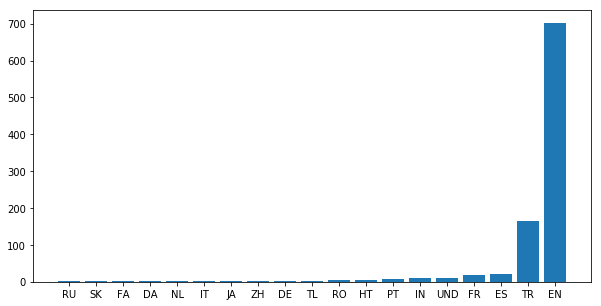

In [9]:
data = pd.DataFrame(graph.run("MATCH (t:Tweet)-[r:IN]->(l:Language) RETURN l.name, count(l) ORDER BY count(l)"))
plt.figure(figsize=(10, 5))
plt.bar(data[0], data[1])
plt.show()

#### Tweets agrupados por fuente

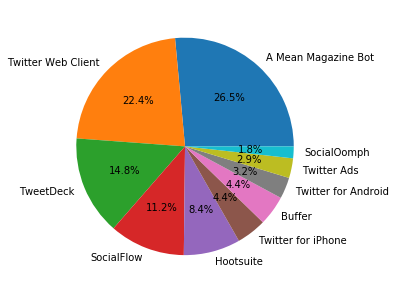

In [10]:
data = pd.DataFrame(graph.run("MATCH (t:Tweet)-[r:FROM]->(s:Source) RETURN s.name, count(s) ORDER BY count(s) DESC LIMIT 10"))
plt.figure(figsize=(10, 5))
plt.pie(data[1], labels=data[0], autopct='%1.1f%%')
plt.show()

#### Usuarios agrupados por ubicación

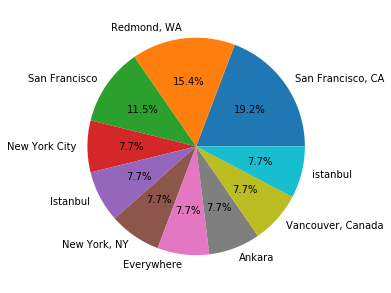

In [11]:
data = pd.DataFrame(graph.run("MATCH (u:User)-[r:LIVES]->(l:Location) RETURN l.name, count(l) ORDER BY count(l) DESC SKIP 1 LIMIT 10"))
plt.figure(figsize=(10, 5))
plt.pie(data[1], labels=data[0], autopct='%1.1f%%')
plt.show()

#### Coordenadas de todos los tweets

In [12]:
m = folium.Map(location=[30, 0], zoom_start=2, tiles='OpenStreetMap')
data = list(graph.run("MATCH (t:Tweet) WHERE t.place IS NOT NULL RETURN t.place, t.coordinate_x, t.coordinate_y"))
for tweet in data:
    x = tweet[1]
    y = tweet[2]
    place = tweet[0]
    folium.Marker([x,y], popup=place).add_to(m)
m